<p style="background-color:#4C8A2E;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Project - Raisin Class Prediction</b></p>

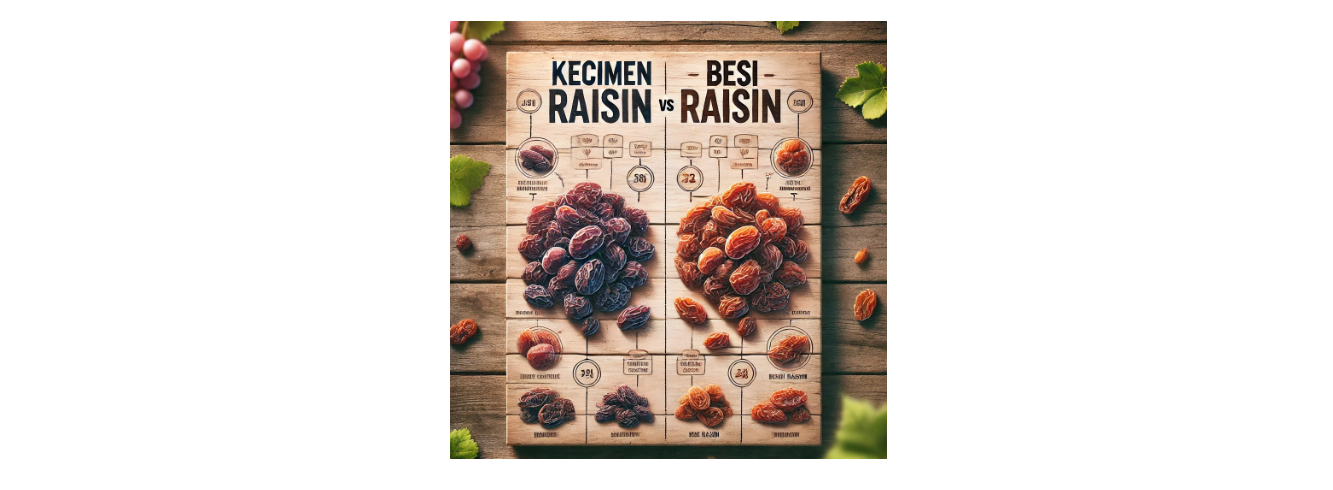

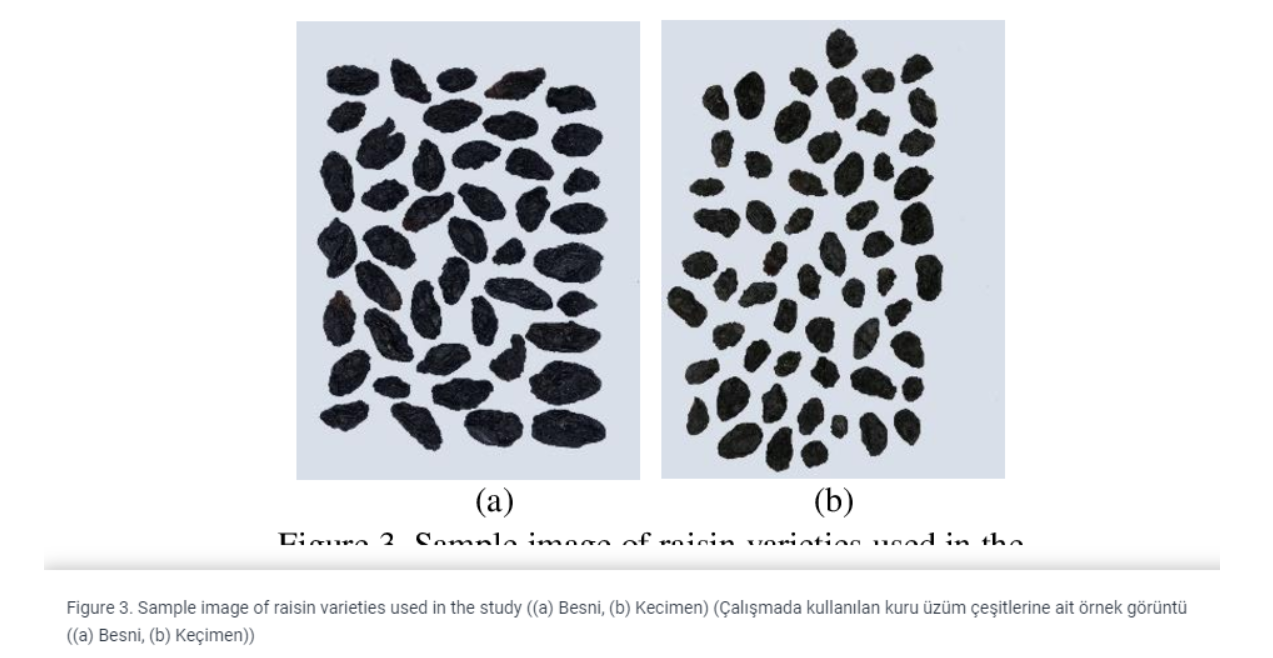

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset & EDA</a></li>
<li><a href="#log-model">Logistic Regression Model</a></li>
<li><a href="#final-model">Final Model & Prediction</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

# <font color='#4C8A2E'> <b>Introduction</b><font color='black'> 

This project focuses on the raisin classification problem. **The study aims to classify the types of raisins using various physical attributes in a dataset, such as area, axis lengths, convex area, and others.** Machine learning algorithms were implemented to perform the classification, and proper preprocessing of the data was ensured. Specifically, feature scaling and performance evaluation were conducted on a dataset with balanced class distribution. The objective of this study is to develop a model capable of accurately predicting the types of raisins and to analyze the resulting outcomes.

<a id='import-library'></a>
# <font color='#4C8A2E'> <b>Importing Libraries</b><font color='black'>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from skimpy import skim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import get_scorer_names

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#4C8A2E'> <b>Loading The Dataset</b><font color='black'> 

**Data Set Information:**

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

In [10]:
df0 = pd.read_excel("Raisin_Dataset.xlsx")
df = df0.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [11]:
df.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
538,145693,591.180144,321.431191,0.839272,151644,0.648528,1595.364,Besni
37,54182,366.066674,192.013274,0.851391,56450,0.611418,968.729,Kecimen
701,152992,572.705396,341.245703,0.803097,155411,0.777525,1500.251,Besni
866,225043,740.003743,390.300858,0.849598,229195,0.744187,1853.893,Besni
474,83800,440.833740,245.381880,0.830760,86346,0.657162,1170.091,Besni
495,146268,588.009214,321.607981,0.837169,150416,0.695421,1535.287,Besni
209,49998,301.780707,212.326943,0.710616,50857,0.779295,834.328,Kecimen
888,68799,356.567808,253.254696,0.703943,71879,0.700929,1041.270,Besni
313,38724,291.001092,170.776267,0.809690,40133,0.780883,769.691,Kecimen
418,71762,387.674104,236.873605,0.791621,73593,0.701678,1038.741,Kecimen


<a id='understanding-dataset'></a>
# <font color='#4C8A2E'> <b>Understanding The Dataset & EDA & Data Visualization</b><font color='black'>

In [13]:
# checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [14]:
df.shape

(900, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [17]:
df.describe(include="object").T

,count,unique,top,freq
Class,900,2,Kecimen,450


In [18]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 900    │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Area              │   0 │     0 │   87800 │    39000 │  25390 │  59350 │  78900 │ 105000 │ 235000 │ ▅▇▃▂▁  │  │
│ │ MajorAxisLength   │   0 │     0 │   430.9 │      116 │  225.6 │  345.4 │  407.8 │  494.2 │  997.3 │  ▅▇▃▁  │  │
│ │ MinorAxisLength   │   0 │     0 │   254.5 │    49.99 │  143.7 │  219.1 │  247.8 │  279.9 │  492.3 │  ▂▇▅▁  │  │
│ │ Eccentricity      │   0 │     0 │  0.7815 │  0.09032 │ 0.3487 │ 0.7418 │ 0.7988 │ 0.8426 │ 0.9621 │   ▁▃▇▂ │  │
│ │ ConvexArea        │   0 │     0 │   91190 │    40770 │  26140 │  61510 │  81650 │ 108400 │ 278200 │ ▆▇▃▁▁  │  │
│ │ Extent            │   0 │     0 │  0.6995 │  0.05347 │ 0.3799 │ 0.6709 │ 0.7074 │  0.735 │ 0.8355 │    ▃▇▁ │  │
│ │ Perimeter         │   0 │     0 │    1166 │    273.8 │  619.1 │  966.4 │   1120 │   1308 │   2698 │  ▃▇▃▁  │  │
│ └───────────────────┴─────┴───────┴─────────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Class                     │       0 │          0 │                            1 │                      900 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

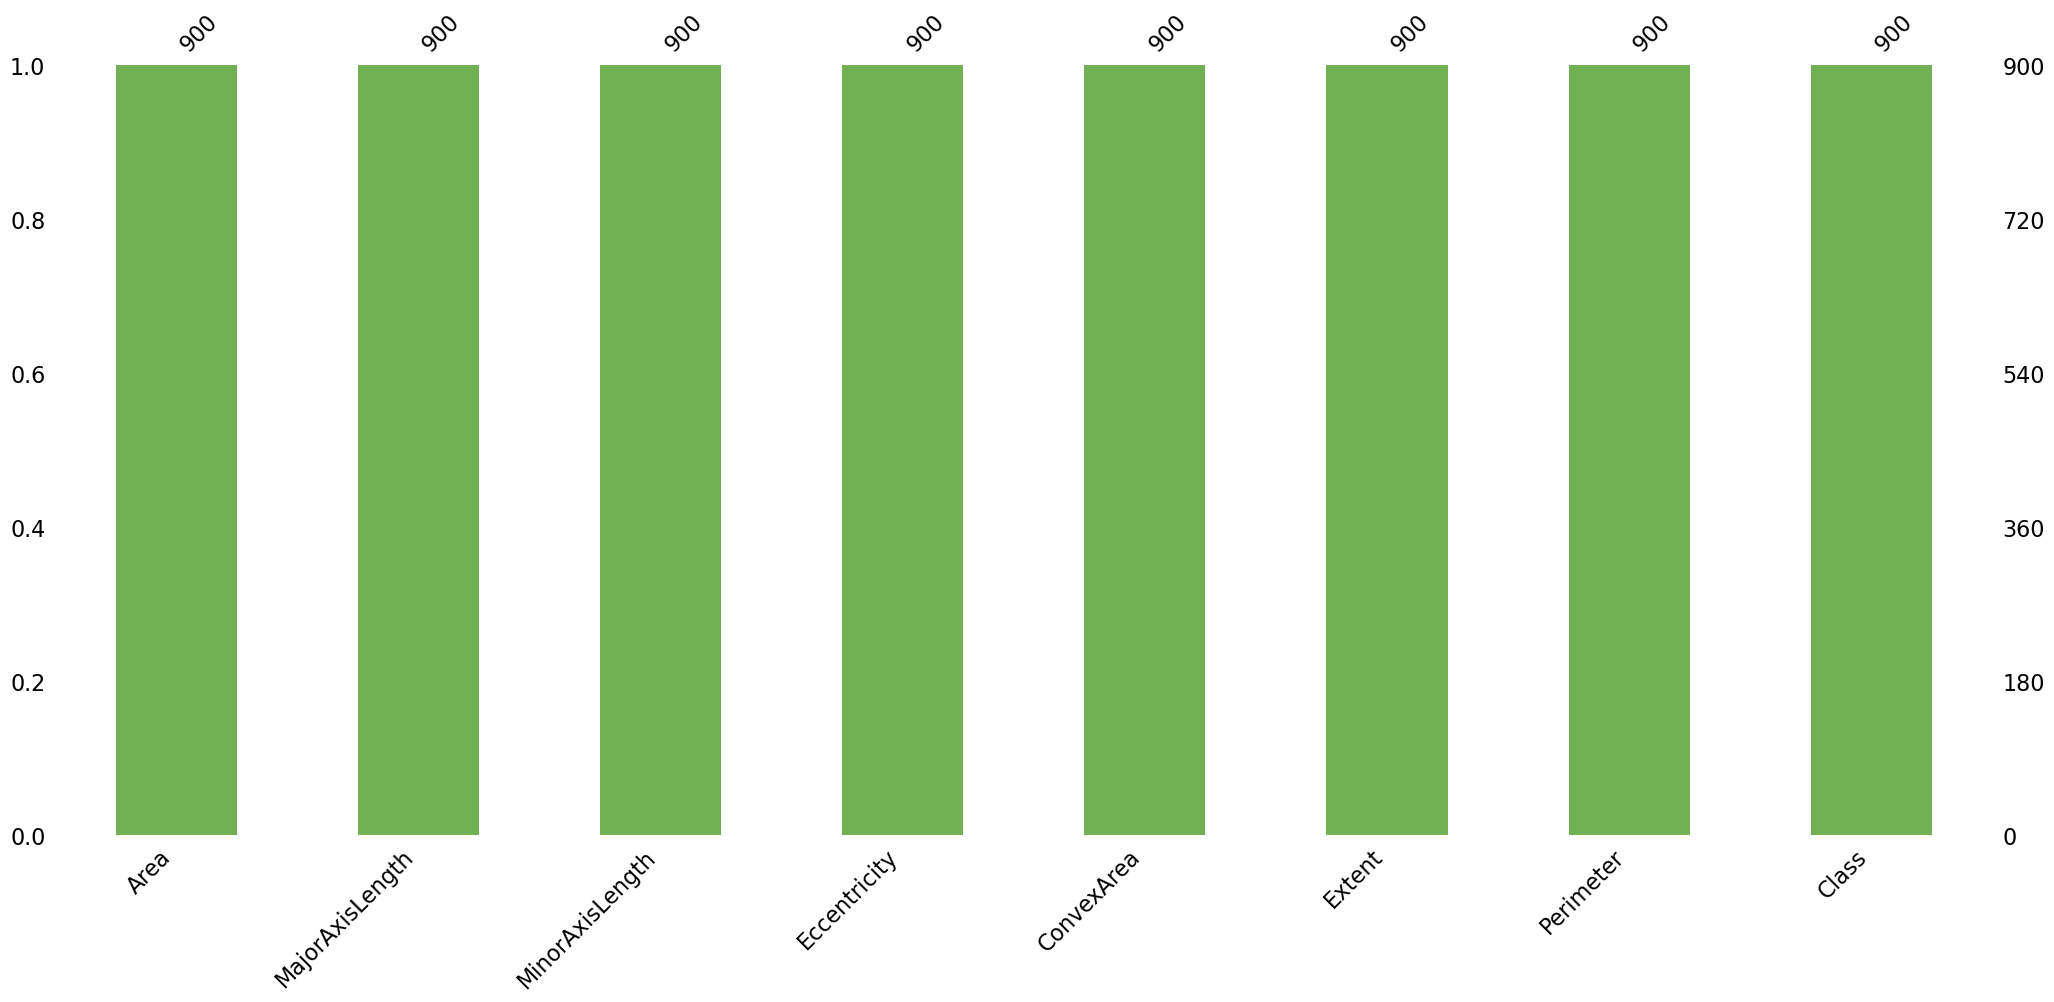

In [19]:
msno.bar(df, color='#72B054');

In [20]:
df.Class.nunique()

2

In [21]:
df.Class.unique()

array(['Kecimen', 'Besni'], dtype=object)

In [22]:
df.Class.value_counts()

# Balanced data

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

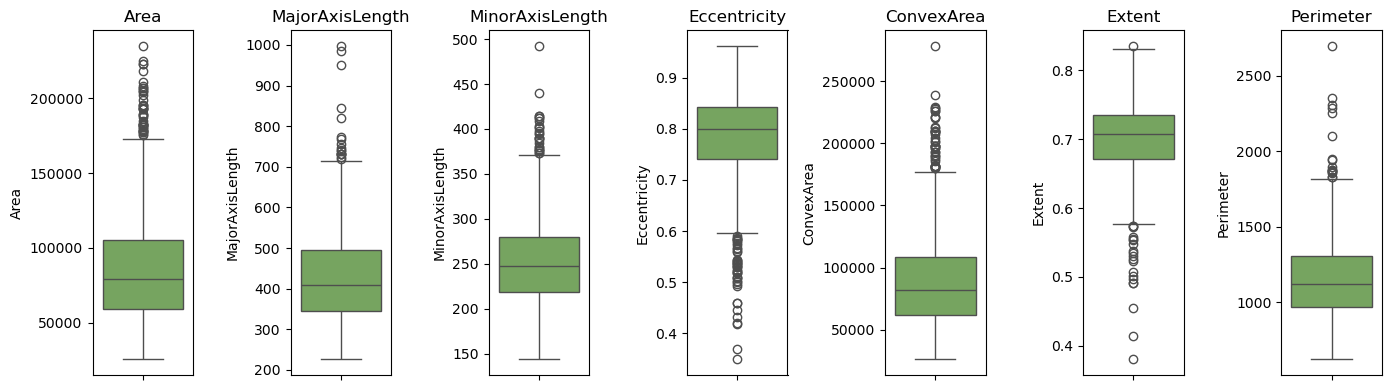

In [23]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numerical_columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter']
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numerical_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='#72B054')
    plt.title(col)

plt.tight_layout() 
plt.show()

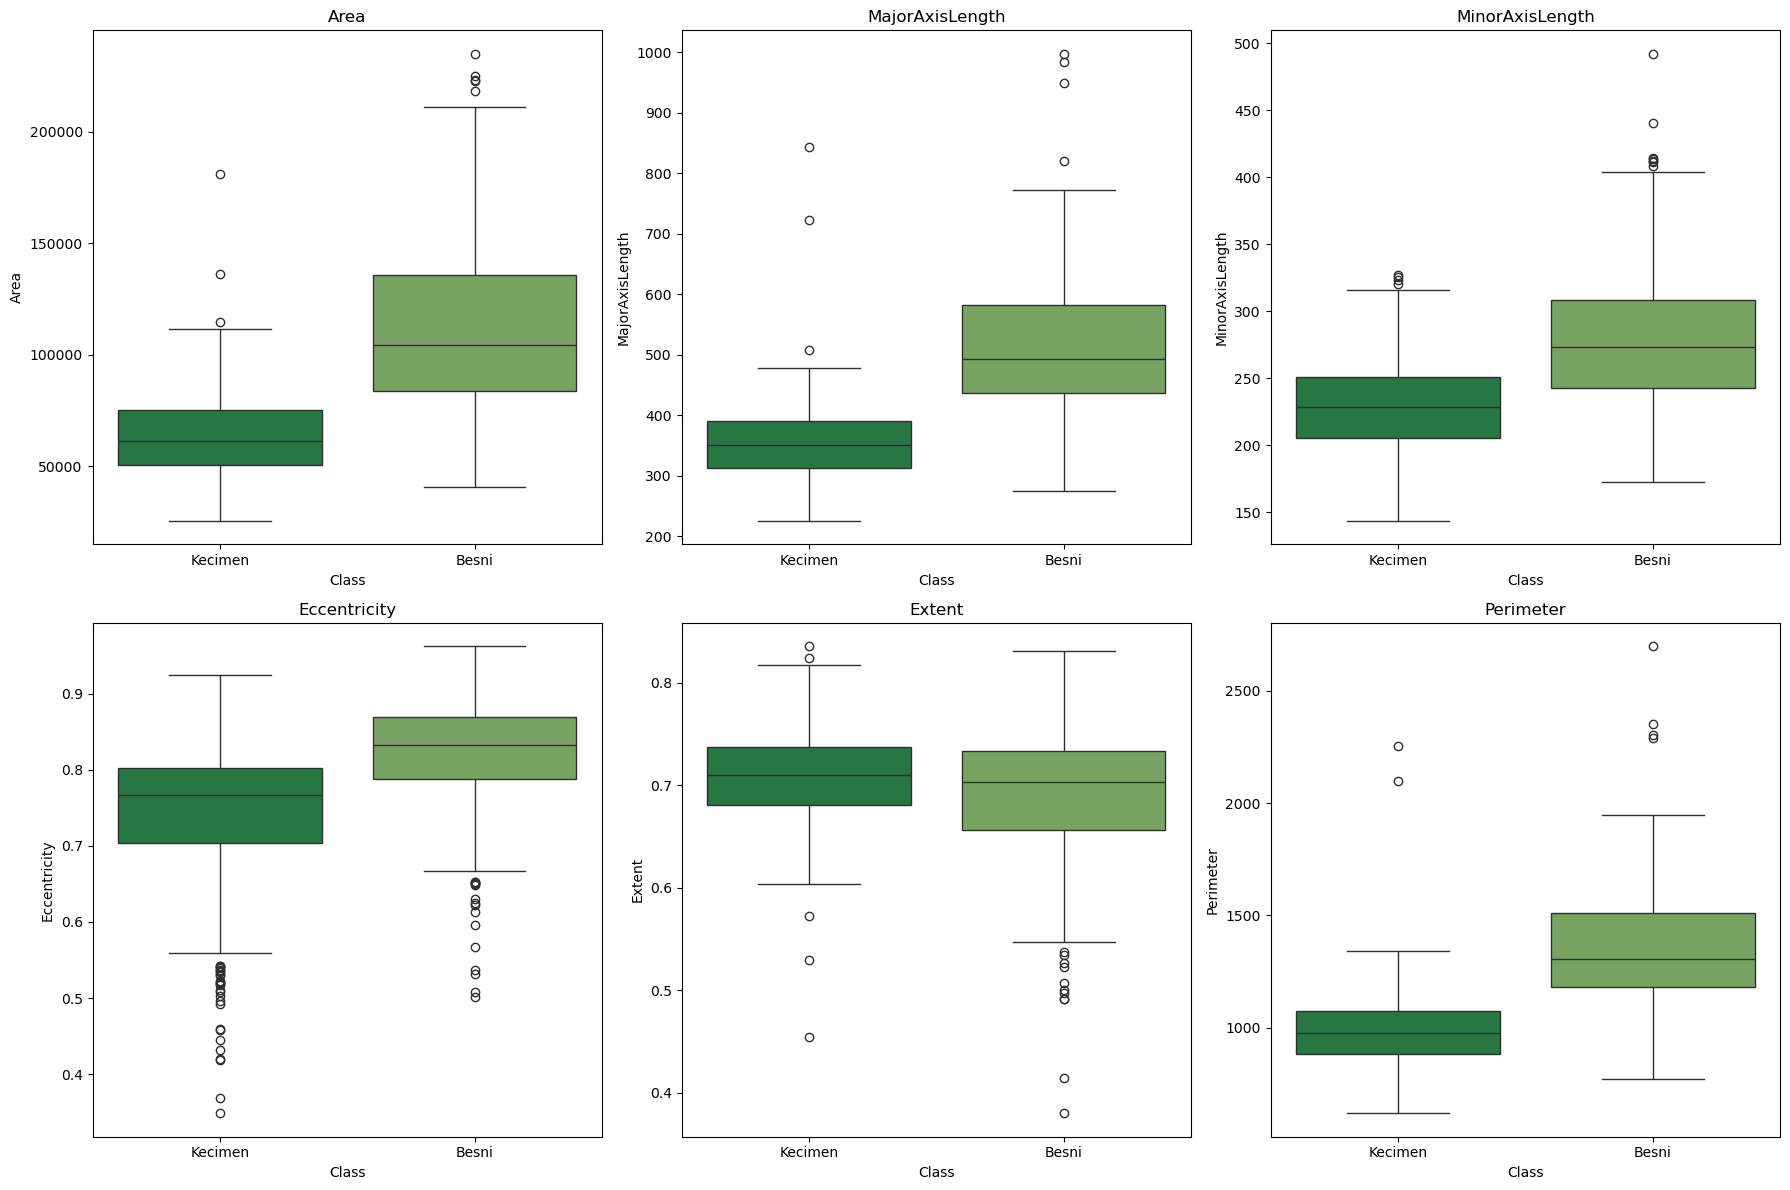

In [24]:
palette1 = ['#1a843f', '#72B054']

# Create a grid of subplots
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

# Remove 'Class' and 'ConvexArea' columns from the list
clmn = df.columns.tolist()
clmn.remove("Class")
clmn.remove("ConvexArea")

# Create a boxplot for each column
for ax, clmn in zip(ax, clmn):
    sns.boxplot(data=df, x="Class", y=clmn, ax=ax, palette=palette1)
    ax.set_title(clmn)  # Add a title to each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# This code creates boxplots for each feature in the dataset, grouped by the 'Class' column,
# visualizing the distribution of each feature across different classes.
# The plots are arranged in a 2x3 grid, with each subplot displaying the distribution of a specific feature.

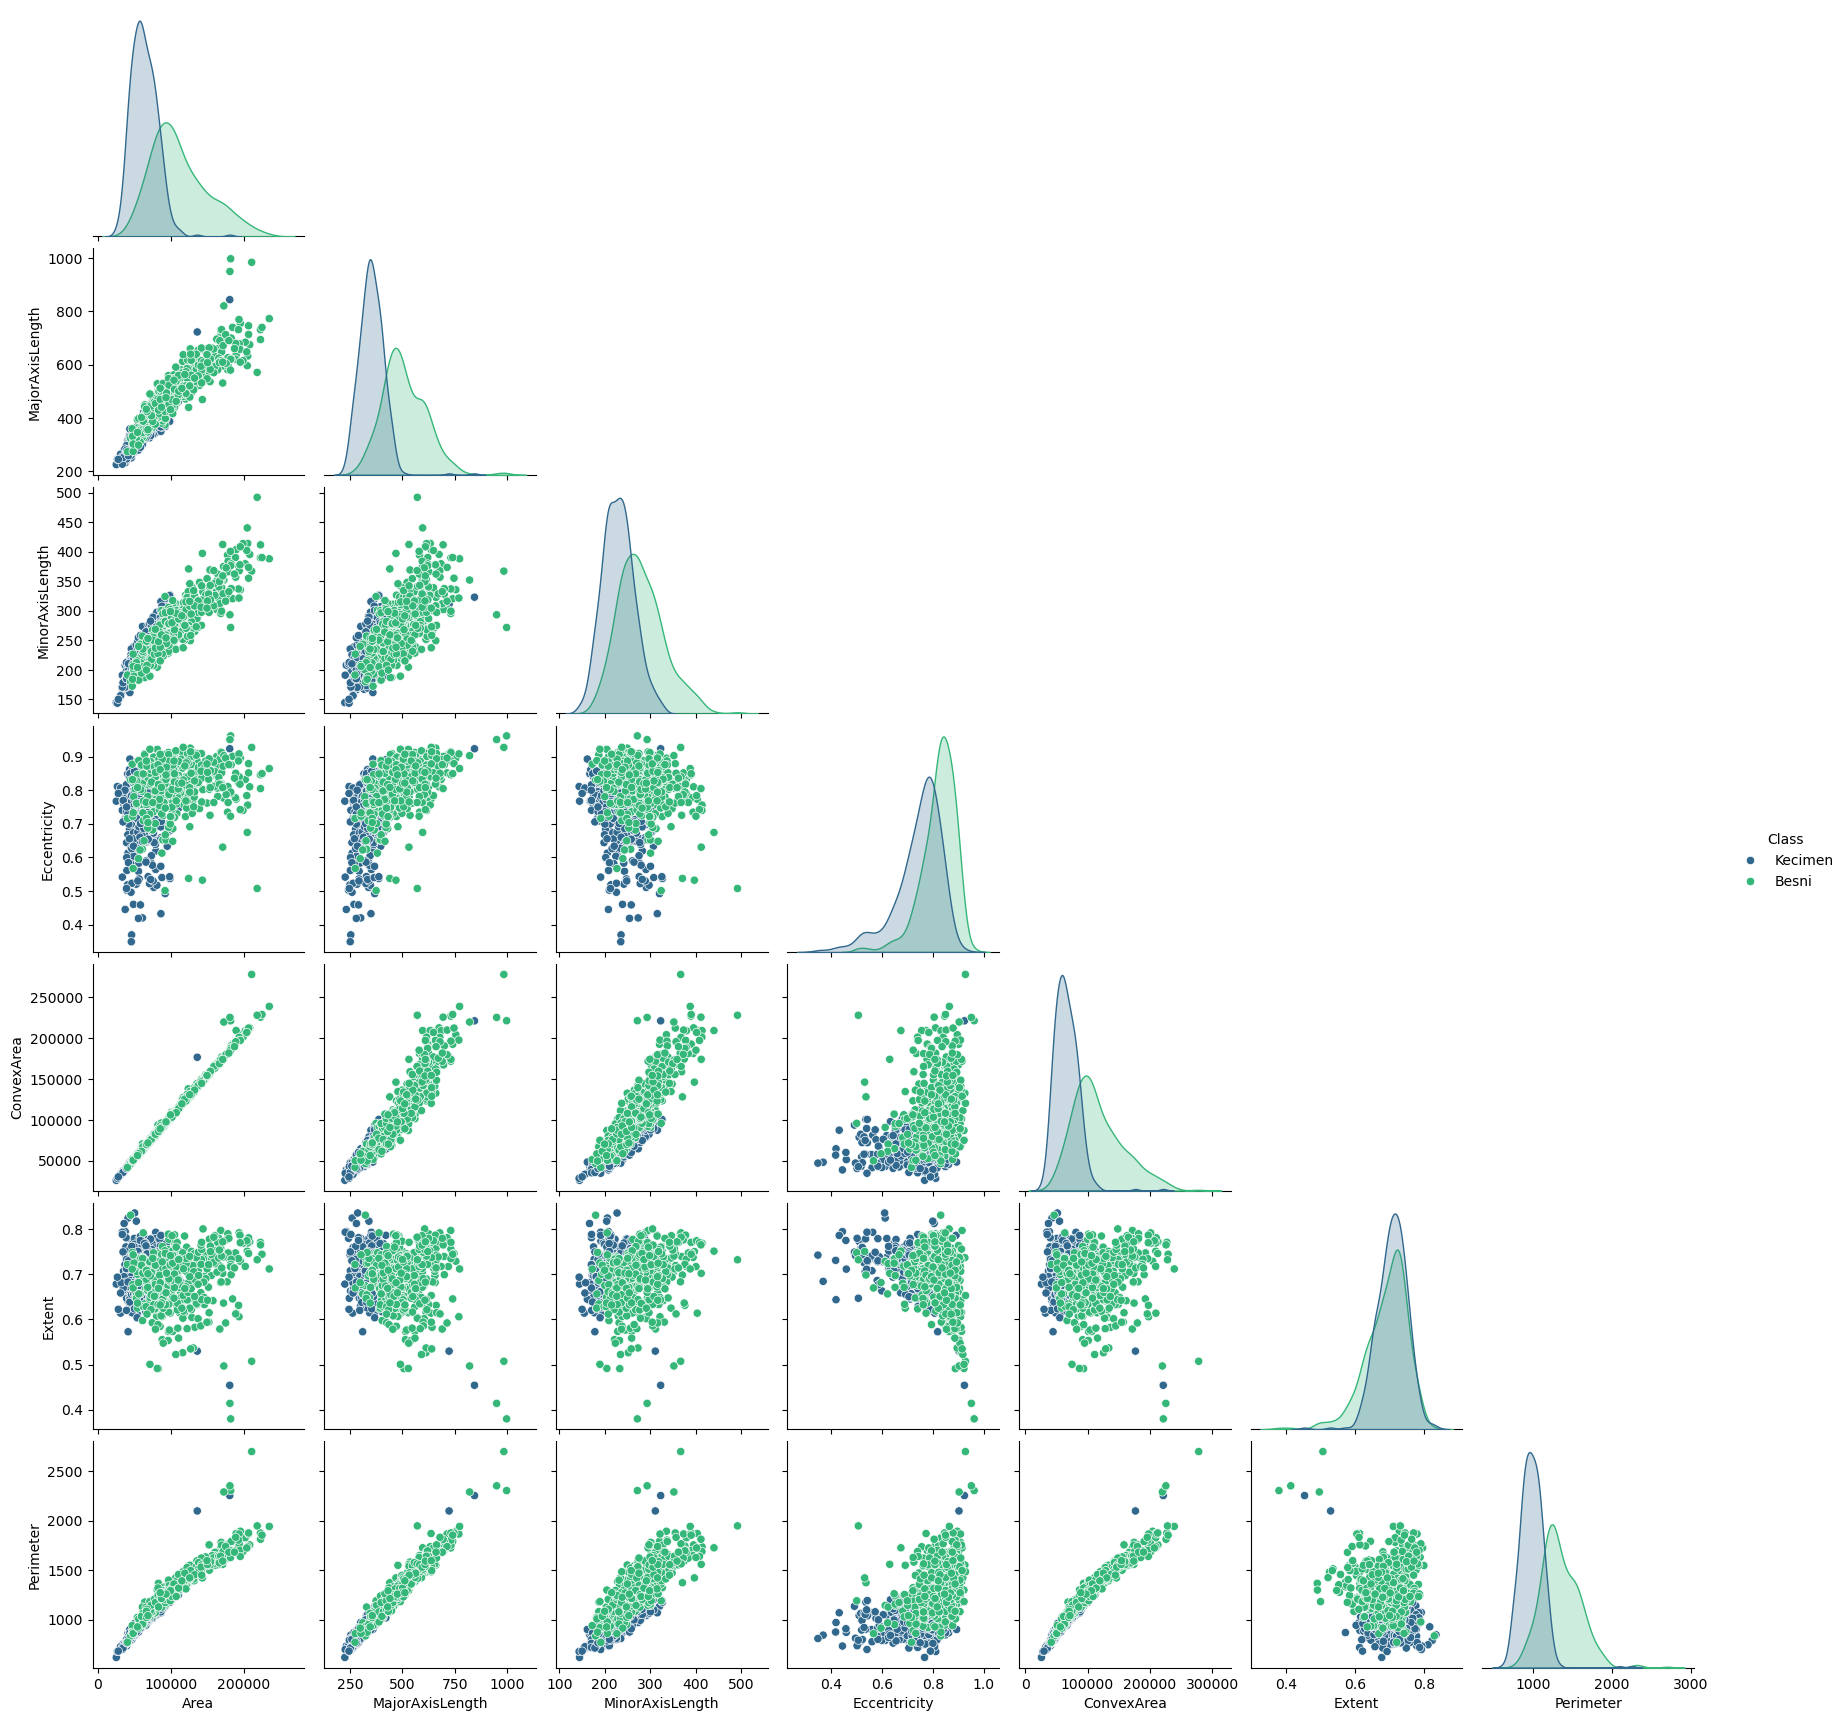

In [25]:
pairplot = sns.pairplot(data=df, corner=True, hue='Class', palette='viridis');

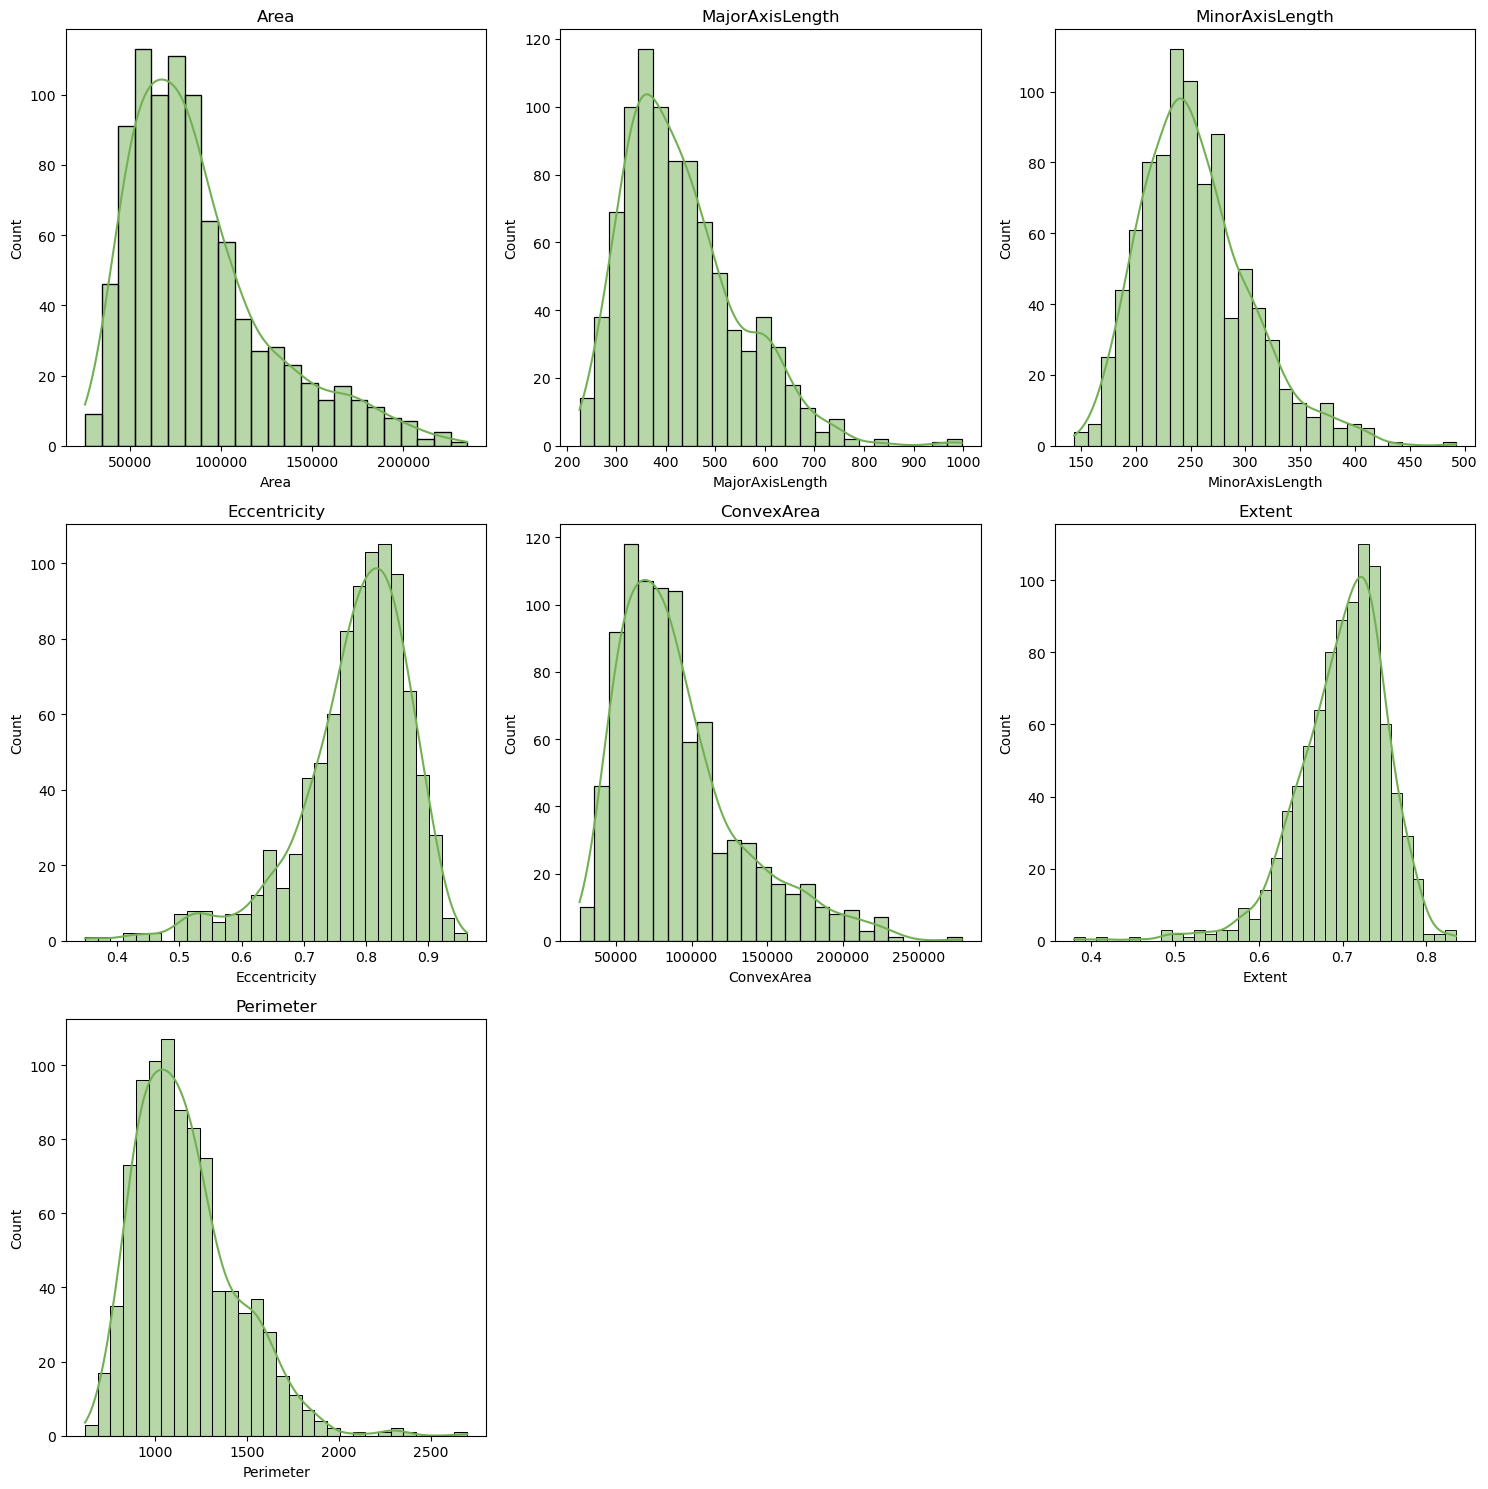

In [26]:
columns = df.columns[:-1]
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='#72B054')
    axes[i].set_title(column)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

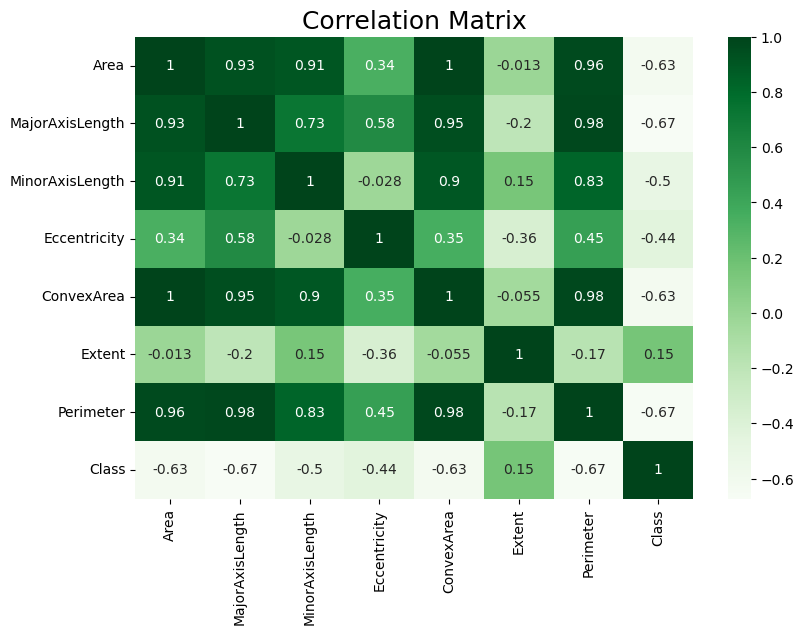

In [141]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [44]:
df["Class"] = df["Class"].map({"Kecimen":1,"Besni":0})
df.sample(5)

# Kecimen: 1 | Besni: 0

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
82,58650,346.338958,219.684365,0.773083,62380,0.660287,991.612,1
47,41502,260.512675,205.865024,0.612810,43114,0.824319,790.427,1
865,154197,582.612179,343.260213,0.808006,160008,0.762219,1555.816,0
153,78991,362.640870,279.090840,0.638518,80355,0.708897,1071.385,1
169,44627,297.259323,194.760278,0.755467,46921,0.675185,848.487,1


<a id='log-model'></a>
# <font color='#4C8A2E'> <b>Logistic Regression Model</b><font color='black'>

## <font color='#72B054'> <b>Train | Test Split</b><font color='black'>

In [46]:
X = df.drop(columns="Class")
y = df.Class

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## <font color='#72B054'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [49]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

In [50]:
pipe_model = Pipeline(steps=operations)

In [51]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [52]:
pipe_model["logistic"].coef_

array([[-3.05665912, -3.18481731, -1.38200149, -2.64526954, -2.66825333,
         1.03259793, -2.88033238]])

In [53]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1], dtype=int64)

## <font color='#72B054'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [55]:
y_pred_proba = pipe_model.predict_proba(X_test)

In [56]:
test_data = pd.concat([X_test, y_test], axis=1)

In [57]:
test_data["pred_proba"] = y_pred_proba[:, 1]

In [58]:
test_data["pred"] = y_pred
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
739,83929,429.090409,252.037563,0.809314,87269,0.704841,1176.227,0,0.437363,0
241,43345,323.859214,175.185745,0.841066,46785,0.649276,877.020,1,0.840114,1
189,78982,421.161849,241.640413,0.819032,81442,0.753437,1102.423,1,0.531551,1
517,97375,468.904038,268.267025,0.820173,100169,0.694717,1244.252,0,0.273457,0
729,80274,404.302495,256.062476,0.773871,84523,0.663542,1153.618,0,0.501851,1
509,169009,719.505878,301.565126,0.907927,174718,0.716927,1781.378,0,0.006373,0
627,104602,478.222652,279.361007,0.811635,106906,0.779914,1263.012,0,0.262629,0
179,48693,306.573907,204.280621,0.745653,50298,0.740128,848.422,1,0.896313,1
174,51941,349.226170,191.817334,0.835649,53893,0.708995,912.259,1,0.801829,1
184,81546,381.348654,273.810099,0.696038,82807,0.711720,1057.448,1,0.647826,1


## <font color='#72B054'> <b>Model Performance</b><font color='black'>

In [60]:
confusion_matrix(y_test, y_pred)

array([[70, 12],
       [ 5, 93]], dtype=int64)

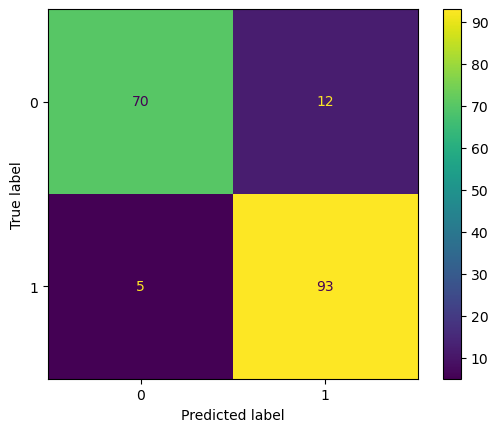

In [61]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)
plt.show()

In [62]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [63]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[70 12]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        82
           1       0.89      0.95      0.92        98

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[305  63]
 [ 44 308]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       368
           1       0.83      0.88      0.85       352

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



## <font color='#72B054'> <b>Cross Validate</b><font color='black'>

In [65]:
scorers_list = get_scorer_names()
print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [66]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.851389
train_accuracy     0.851235
test_precision     0.832059
train_precision    0.829562
test_recall        0.874762
train_recall       0.875628
test_f1            0.852056
train_f1           0.851968
dtype: float64

## <font color='#72B054'> <b>GridSearchCV</b><font color='black'>

In [68]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression(max_iter=5000))]

model = Pipeline(steps=operations)

In [69]:
penalty = ["l1", "l2"]

C = np.logspace(-1, 5, 20)

param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [70]:
grid_model = GridSearchCV(model,
                          param_grid= param_grid,
                          cv= 5,
                          return_train_score= True
                         )

In [71]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1....
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [72]:
grid_model.best_params_

{'logistic__C': 7.847599703514611,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [73]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=7.847599703514611, max_iter=5000,
                                    solver='liblinear'))])

In [74]:
y_pred = grid_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1], dtype=int64)

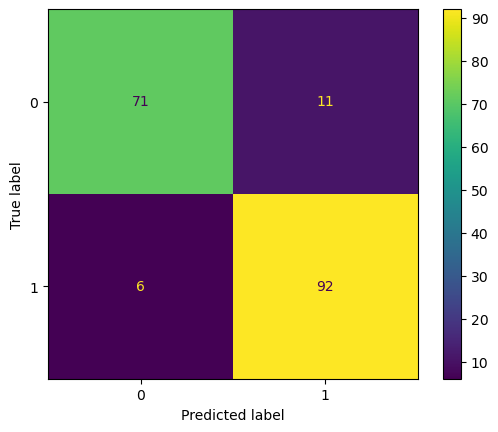

In [75]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()

In [76]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[71 11]
 [ 6 92]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        82
           1       0.89      0.94      0.92        98

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[307  61]
 [ 42 310]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       368
           1       0.84      0.88      0.86       352

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## <font color='#72B054'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

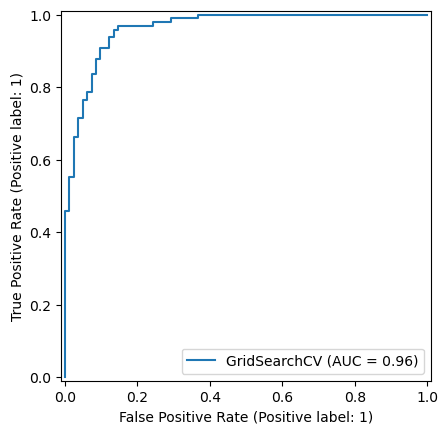

In [78]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

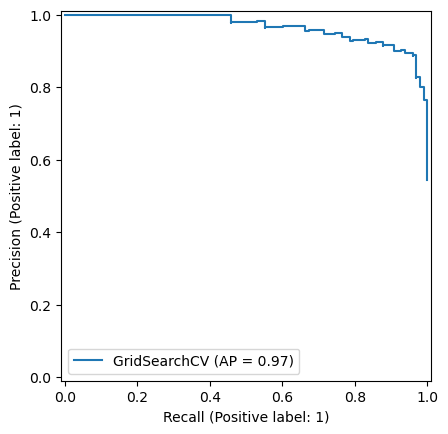

In [79]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

<a id='final-model'></a>
# <font color='#4C8A2E'> <b>Final Model & Prediction</b><font color='black'>

In [81]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression(C=7.847599703514611, class_weight='balanced',
                                                         penalty='l2', solver='liblinear'))]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=7.847599703514611,
                                    class_weight='balanced',
                                    solver='liblinear'))])

## <font color='#72B054'> <b>Saving Model Using Pickle</b><font color='black'>

In [83]:
import pickle
pickle.dump(final_model, open("final_model", "wb"))

## <font color='#72B054'> <b>Opening and Running Model Using Pickle</b><font color='black'>

In [85]:
new_model = pickle.load(open("final_model", "rb"))

## <font color='#72B054'> <b>Prediction</b><font color='black'>

In [87]:
# Creating new data using ChatGPT
my_dict = {
    "Area": [68514, 79102, 88843, 54627, 103472, 91234, 67251, 112348, 94325, 81267],
    "MajorAxisLength": [355.72, 428.41, 482.93, 312.87, 408.32, 447.91, 368.45, 472.13, 439.78, 425.69],
    "MinorAxisLength": [222.14, 251.87, 277.34, 213.45, 269.87, 263.49, 231.76, 245.13, 288.92, 252.46],
    "Eccentricity": [0.764, 0.823, 0.786, 0.732, 0.841, 0.798, 0.742, 0.771, 0.793, 0.851],
    "ConvexArea": [65342, 81234, 94213, 60421, 107945, 91487, 72813, 115342, 97542, 89673],
    "Extent": [0.689, 0.721, 0.705, 0.737, 0.671, 0.726, 0.658, 0.695, 0.743, 0.713],
    "Perimeter": [955.41, 1104.87, 1243.13, 857.92, 1198.34, 1147.28, 904.65, 1293.24, 1052.48, 1010.92]
}

In [88]:
new_sample = pd.DataFrame(my_dict)
new_sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,68514,355.72,222.14,0.764,65342,0.689,955.41
1,79102,428.41,251.87,0.823,81234,0.721,1104.87
2,88843,482.93,277.34,0.786,94213,0.705,1243.13
3,54627,312.87,213.45,0.732,60421,0.737,857.92
4,103472,408.32,269.87,0.841,107945,0.671,1198.34
5,91234,447.91,263.49,0.798,91487,0.726,1147.28
6,67251,368.45,231.76,0.742,72813,0.658,904.65
7,112348,472.13,245.13,0.771,115342,0.695,1293.24
8,94325,439.78,288.92,0.793,97542,0.743,1052.48
9,81267,425.69,252.46,0.851,89673,0.713,1010.92


In [89]:
prediction = new_model.predict(new_sample)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [90]:
prediction_proba = new_model.predict_proba(new_sample)
prediction_proba

array([[0.19668734, 0.80331266],
       [0.50115236, 0.49884764],
       [0.73497614, 0.26502386],
       [0.06449014, 0.93550986],
       [0.77500661, 0.22499339],
       [0.61600958, 0.38399042],
       [0.20209321, 0.79790679],
       [0.86973816, 0.13026184],
       [0.52111401, 0.47888599],
       [0.50132087, 0.49867913]])

In [91]:
new_sample["pred_proba"] = prediction_proba[:,1]
new_sample["pred"] = prediction
new_sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred_proba,pred
0,68514,355.72,222.14,0.764,65342,0.689,955.41,0.803313,1
1,79102,428.41,251.87,0.823,81234,0.721,1104.87,0.498848,0
2,88843,482.93,277.34,0.786,94213,0.705,1243.13,0.265024,0
3,54627,312.87,213.45,0.732,60421,0.737,857.92,0.935510,1
4,103472,408.32,269.87,0.841,107945,0.671,1198.34,0.224993,0
5,91234,447.91,263.49,0.798,91487,0.726,1147.28,0.383990,0
6,67251,368.45,231.76,0.742,72813,0.658,904.65,0.797907,1
7,112348,472.13,245.13,0.771,115342,0.695,1293.24,0.130262,0
8,94325,439.78,288.92,0.793,97542,0.743,1052.48,0.478886,0
9,81267,425.69,252.46,0.851,89673,0.713,1010.92,0.498679,0


In [92]:
# loading new data
new_data = pd.read_excel("Raisin_Dataset_new.xlsx")
new_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,61600,350.182754,225.842771,0.764243,63397,0.746830,972.472
2,52266,320.442561,213.857500,0.744716,54116,0.684289,923.190
3,51180,288.631065,226.630491,0.619254,52396,0.737443,855.997
4,55787,333.703453,226.951208,0.733121,59520,0.688592,977.425
5,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
6,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
7,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
8,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548
9,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862


In [93]:
prediction2 = new_model.predict(new_data)
prediction2

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
prediction_proba2 = new_model.predict_proba(new_data)
prediction_proba2

array([[0.60761456, 0.39238544],
       [0.13853259, 0.86146741],
       [0.09577961, 0.90422039],
       [0.02782284, 0.97217716],
       [0.12448525, 0.87551475],
       [0.61414677, 0.38585323],
       [0.73772918, 0.26227082],
       [0.66209827, 0.33790173],
       [0.84540012, 0.15459988],
       [0.90344388, 0.09655612]])

In [95]:
new_data["pred_proba"] = prediction_proba2[:,1]
new_data["pred"] = prediction2
new_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred_proba,pred
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0.392385,0
1,61600,350.182754,225.842771,0.764243,63397,0.746830,972.472,0.861467,1
2,52266,320.442561,213.857500,0.744716,54116,0.684289,923.190,0.904220,1
3,51180,288.631065,226.630491,0.619254,52396,0.737443,855.997,0.972177,1
4,55787,333.703453,226.951208,0.733121,59520,0.688592,977.425,0.875515,1
5,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0.385853,0
6,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0.262271,0
7,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0.337902,0
8,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0.154600,0
9,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,0.096556,0


<a id='conclusion'></a>
# <font color='#4C8A2E'> <b>Conclusion</b><font color='black'>

In this project, machine learning models were applied based on the physical attributes used to distinguish raisin classes. The results demonstrated that proper scaling of the data and working with a balanced dataset significantly impacted classification performance. The developed model successfully predicted the types of raisins with high accuracy, highlighting the potential of machine learning in the agriculture and food industries. In the future, the model's performance can be further improved by using additional data and experimenting with different algorithms.

<p style="background-color:#4C8A2E;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>